In [3]:
options(scipen = 20, digits = 4)

lapply(c(
    "data.table",
    "stringr",
    "Matrix",
    "xgboost",
    "pROC"
), require, character.only=T)

Loading required package: pROC
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

In [4]:
train <- fread("_data/train.csv")
test <- fread("_data/test.csv")

In [7]:


train

train[, list(Samples=.N, Sales=sum(Sale), HitRatio=sum(Sale)/.N)]



LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE


Samples,Sales,HitRatio
20,7,0.35


In [8]:
train[, RowIdx := .I]
test[, RowIdx := .I]



LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10


In [9]:
tobMap <- train[, list(Samples=.N), by=TypeOfBusiness]
tobMap[, TobIdx := .I]

TypeOfBusiness,Samples,TobIdx
corner store,4,1
hobbies & toys,1,2
cothing,4,3
NA,1,4
restaurant,2,5
grocery,2,6
drug store,1,7
auto parts,3,8
books,1,9
law office,1,10


In [10]:
#train
train[tobMap, TobIdx := TobIdx, on = "TypeOfBusiness"]
trainTOBSparseM <- sparseMatrix(
    i=train$RowIdx,
    j=train$TobIdx,
    x=1,
    dimnames=list(NULL, tobMap$TypeOfBusiness)
) # Build a sparse matrix


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3


In [11]:
test[tobMap, TobIdx := TobIdx, on="TypeOfBusiness"]
testTOBSparseM <- sparseMatrix(
    i=test[!is.na(TobIdx)]$RowIdx, 
    j=test[!is.na(TobIdx)]$TobIdx,
    x = 1,
    dims = c(nrow(test), nrow(tobMap)),
    dimnames = list(NULL, tobMap$TypeOfBusiness)
)

LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10


In [12]:
#----------------------------------------------------------
# Area Code

train[, AreaCode := substr(PhoneNumber, 1, 3)] # train
test[, AreaCode := substr(PhoneNumber, 1, 3)] # test

# Generate a map to map the values in AreaCode to a sparse matrix
areacodeMap <- train[, list(Samples=.N), by=AreaCode]
areacodeMap[, AreaCodeIdx := .I]


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504


AreaCode,Samples,AreaCodeIdx
310,5,1
504,10,2
646,5,3


In [13]:
# train
train[areacodeMap, AreaCodeIdx := AreaCodeIdx, on="AreaCode"]
trainAreaCodeSparseM <- sparseMatrix(
    i=train$RowIdx,
    j=train$AreaCodeIdx,
    x=1, 
    dimnames=list(NULL, areacodeMap$AreaCode)
)

LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3


In [14]:
# test
test[areacodeMap, AreaCodeIdx := AreaCodeIdx, on="AreaCode"]
testAreaCodeSparseM <- sparseMatrix(
    i=test[!is.na(AreaCodeIdx)]$RowIdx,
    j=test[!is.na(AreaCodeIdx)]$AreaCodeIdx,
    x=1,
    dims=c(nrow(test), nrow(areacodeMap)),
    dimnames = list(NULL, areacodeMap$AreaCode)
)

LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2


In [15]:
#--------------------------------------------------------
# Website Extension 

extensions <- c("com", "net", "org", "other", "none")

# train
train[is.na(Website), WebsiteExtension := "none"]
train[str_detect(Website, ".com"), WebsiteExtension := "com"]
train[str_detect(Website, ".net"), WebsiteExtension := "net"]
train[str_detect(Website, ".org"), WebsiteExtension := "org"]
train[is.na(WebsiteExtension), WebsiteExtension := "other"]

# test
test[is.na(Website), WebsiteExtension := "none"]
test[str_detect(Website, ".com"), WebsiteExtension := "com"]
test[str_detect(Website, ".net"), WebsiteExtension := "net"]
test[str_detect(Website, ".org"), WebsiteExtension := "org"]
test[is.na(WebsiteExtension), WebsiteExtension := "other"]

LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1,NA
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2,none
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2,none
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2,none
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2,NA
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2,none
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3,NA
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3,none
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2,NA
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3,NA


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1,NA
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2,none
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2,none
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2,none
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2,NA
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2,none
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3,com
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3,none
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2,com
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1,net
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2,none
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2,none
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2,none
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2,net
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2,none
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3,com
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3,none
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2,com
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1,net
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2,none
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2,none
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2,none
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2,net
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2,none
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3,com
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3,none
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2,com
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1,net
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2,none
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2,none
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2,none
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2,net
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2,none
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3,com
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3,none
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2,com
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1,NA
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3,none
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3,none
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2,NA
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1,NA
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3,NA
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2,NA
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1,none
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2,NA
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2,NA


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1,NA
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3,none
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3,none
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2,NA
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1,NA
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3,com
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2,NA
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1,none
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2,NA
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1,net
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3,none
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3,none
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2,NA
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1,NA
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3,com
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2,NA
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1,none
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2,NA
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1,net
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3,none
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3,none
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2,NA
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1,org
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3,com
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2,org
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1,none
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2,NA
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2,com


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1,net
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3,none
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3,none
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2,other
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1,org
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3,com
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2,org
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1,none
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2,other
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2,com


In [16]:
# Generate a map to map the values in WebsiteExtension to a sparse matrix
extensionMap <- train[, list(Samples=.N), by=WebsiteExtension]
extensionMap[, ExtensionIdx := .I]

# train 
train[extensionMap, ExtensionIdx := ExtensionIdx, on = "WebsiteExtension"]
trainExtensionSparseM <- sparseMatrix(
    i=train$RowIdx,
    j=train$ExtensionIdx,
    x=1,
    dimnames=list(NULL, extensionMap$WebsiteExtension)
)

# test
test[extensionMap, ExtensionIdx := ExtensionIdx, on="WebsiteExtension"]
testExtensionSparseM <- sparseMatrix(
    i=test[!is.na(ExtensionIdx)]$RowIdx,
    j=test[!is.na(ExtensionIdx)]$ExtensionIdx,
    x=1,
    dims=c(nrow(test), nrow(extensionMap)),
    dimnames=list(NULL, extensionMap$WebsiteExtension)
)


WebsiteExtension,Samples,ExtensionIdx
net,3,1
none,8,2
com,9,3


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension,ExtensionIdx
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,owner,FALSE,1,1,310,1,net,1
9,Rampart Supplies,corner store,7,NA,NA,5045973037,general line,FALSE,2,1,504,2,none,2
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,other,FALSE,3,2,504,2,none,2
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,other,FALSE,4,1,504,2,none,2
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,other,FALSE,5,3,504,2,net,1
17,Sunshine Boutique,cothing,2,11,NA,5046647993,manager,FALSE,6,3,504,2,none,2
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,general line,TRUE,7,3,646,3,com,3
24,The Reading Corner,NA,17,NA,NA,6467041649,other,FALSE,8,4,646,3,none,2
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,owner,TRUE,9,5,504,2,com,3
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,owner,TRUE,10,3,646,3,com,3


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension,ExtensionIdx
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,other,FALSE,1,10,310,1,net,1
3,Bait n Tackle,NA,22,NA,NA,6464315297,owner,TRUE,2,4,646,3,none,2
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,general line,FALSE,3,5,646,3,none,2
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,general line,FALSE,4,2,504,2,other,NA
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,owner,FALSE,5,5,310,1,org,NA
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,manager,TRUE,6,6,646,3,com,3
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,owner,FALSE,7,4,504,2,org,NA
22,Tools & Supplies,NA,NA,NA,NA,3101508786,owner,FALSE,8,4,310,1,none,2
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,owner,FALSE,9,9,504,2,other,NA
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,owner,FALSE,10,10,504,2,com,3


In [17]:
#-------------------------------------------
# Contact (convert to numeric, 1-4)

# In this case, we know all the possible contact types
contacts <- c("general line", "other", "manager", "owner")
train[, Contact := match(Contact, contacts)]
test[, Contact := match(Contact, contacts)]

LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension,ExtensionIdx
8,Lots O' Stuff,corner store,NA,NA,lotsostuff.net,3106358130,4,FALSE,1,1,310,1,net,1
9,Rampart Supplies,corner store,7,NA,NA,5045973037,1,FALSE,2,1,504,2,none,2
4,Joe's Hobby Shop,hobbies & toys,NA,NA,NA,5043304798,2,FALSE,3,2,504,2,none,2
28,Smokes and Beer,corner store,NA,NA,NA,5046995720,2,FALSE,4,1,504,2,none,2
10,Missy's,cothing,NA,NA,missysclothesstore.net,5045705441,2,FALSE,5,3,504,2,net,1
17,Sunshine Boutique,cothing,2,11,NA,5046647993,3,FALSE,6,3,504,2,none,2
21,Taylor Anne,cothing,163,14,taylorannestore.com,6464316190,1,TRUE,7,3,646,3,com,3
24,The Reading Corner,NA,17,NA,NA,6467041649,2,FALSE,8,4,646,3,none,2
23,Hungry Hippo,restaurant,51,28,hhcafe.com,5049414938,4,TRUE,9,5,504,2,com,3
16,Frank's Shoes,cothing,17,3,franksshoes.com,6465266938,4,TRUE,10,3,646,3,com,3


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension,ExtensionIdx
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,2,FALSE,1,10,310,1,net,1
3,Bait n Tackle,NA,22,NA,NA,6464315297,4,TRUE,2,4,646,3,none,2
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,1,FALSE,3,5,646,3,none,2
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,1,FALSE,4,2,504,2,other,NA
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,4,FALSE,5,5,310,1,org,NA
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,3,TRUE,6,6,646,3,com,3
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,4,FALSE,7,4,504,2,org,NA
22,Tools & Supplies,NA,NA,NA,NA,3101508786,4,FALSE,8,4,310,1,none,2
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,4,FALSE,9,9,504,2,other,NA
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,4,FALSE,10,10,504,2,com,3


In [18]:
#----------------------------------------------
# Combine training features into a single sparse matrix

# Insert the non sparse features into a dgCMatrix
trainNonSparseFeats <- Matrix(
    as.matrix(train[, list(Contact, FacebookLikes, TwitterFollowers)]), 
    sparse=TRUE
)
testNonSparseFeats <- Matrix(
    as.matrix(test[, list(Contact, FacebookLikes, TwitterFollowers)]),
    sparse=TRUE
)


In [19]:
# Combine all the sparse matrices into one big sparse matrix
trainM <- do.call(cBind, list(trainNonSparseFeats, trainTOBSparseM, trainAreaCodeSparseM, trainExtensionSparseM))
testM <- do.call(cBind, list(testNonSparseFeats, testTOBSparseM, testAreaCodeSparseM, testExtensionSparseM))


In [20]:
# Extract the column names of the matrix into a vector called 'features'
features <- c(dimnames(trainM)[[2]])

#===================================================
# XGBoost Model

set.seed(2016)
boostingParams = list(
    objective="binary:logistic", 
    eval_metric="auc", 
    eta=0.3,
    max.depth=10,
    subsample=0.75,
    colsample_bytree=0.75,
    min_child_weight=1,
    gamma=0,
    lambda=0,
    alpha=0
)
bst <- xgboost(params=boostingParams, data=trainM, label=as.matrix(train$Sale)*1, nrounds=5)

[1]	train-auc:0.747253 
[2]	train-auc:0.851648 
[3]	train-auc:0.851648 
[4]	train-auc:0.851648 
[5]	train-auc:0.851648 


Feature,Gain,Cover,Frequency
FacebookLikes,0.5113,0.4424,0.4286
Contact,0.4887,0.5576,0.5714


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension,ExtensionIdx,ProbSale
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,2,FALSE,1,10,310,1,net,1,0.2101
3,Bait n Tackle,NA,22,NA,NA,6464315297,4,TRUE,2,4,646,3,none,2,0.7122
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,1,FALSE,3,5,646,3,none,2,0.2101
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,1,FALSE,4,2,504,2,other,NA,0.3682
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,4,FALSE,5,5,310,1,org,NA,0.7122
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,3,TRUE,6,6,646,3,com,3,0.5365
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,4,FALSE,7,4,504,2,org,NA,0.7122
22,Tools & Supplies,NA,NA,NA,NA,3101508786,4,FALSE,8,4,310,1,none,2,0.7122
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,4,FALSE,9,9,504,2,other,NA,0.5548
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,4,FALSE,10,10,504,2,com,3,0.7122


LeadID,CompanyName,TypeOfBusiness,FacebookLikes,TwitterFollowers,Website,PhoneNumber,Contact,Sale,RowIdx,TobIdx,AreaCode,AreaCodeIdx,WebsiteExtension,ExtensionIdx,ProbSale,ProbSaleRk
3,Bait n Tackle,NA,22,NA,NA,6464315297,4,TRUE,2,4,646,3,none,2,0.7122,1
12,Bob's Coffee House,restaurant,NA,10,bobscoffee.org,3101449412,4,FALSE,5,5,310,1,org,NA,0.7122,2
19,Suit & Tie Depot,NA,64,25,suitandtiedepot.org,5046063929,4,FALSE,7,4,504,2,org,NA,0.7122,3
22,Tools & Supplies,NA,NA,NA,NA,3101508786,4,FALSE,8,4,310,1,none,2,0.7122,4
30,Katz Claims,law office,144,36,katzclaims.com,5045337861,4,FALSE,10,10,504,2,com,3,0.7122,5
29,Reading Rainbow,books,6,NA,readingrainbowstore.us,5049169286,4,FALSE,9,9,504,2,other,NA,0.5548,6
13,Boudreaux's,grocery,27,NA,groceryonline.com/boudreauxs,6468440060,3,TRUE,6,6,646,3,com,3,0.5365,7
11,Toys Galore,hobbies & toys,8,NA,toysgalore.co,5046252309,1,FALSE,4,2,504,2,other,NA,0.3682,8
2,The Law Offices of Smith,law office,87,46,smithlaw.net,3109859670,2,FALSE,1,10,310,1,net,1,0.2101,9
6,Smokie's Bar & Grill,restaurant,215,NA,NA,6461572195,1,FALSE,3,5,646,3,none,2,0.2101,10


ProbSaleRk,CompanyName,ProbSale,Sale
1,Bait n Tackle,0.7122,TRUE
2,Bob's Coffee House,0.7122,FALSE
3,Suit & Tie Depot,0.7122,FALSE
4,Tools & Supplies,0.7122,FALSE
5,Katz Claims,0.7122,FALSE
6,Reading Rainbow,0.5548,FALSE
7,Boudreaux's,0.5365,TRUE
8,Toys Galore,0.3682,FALSE
9,The Law Offices of Smith,0.2101,FALSE
10,Smokie's Bar & Grill,0.2101,FALSE


Area under the curve: 0.562

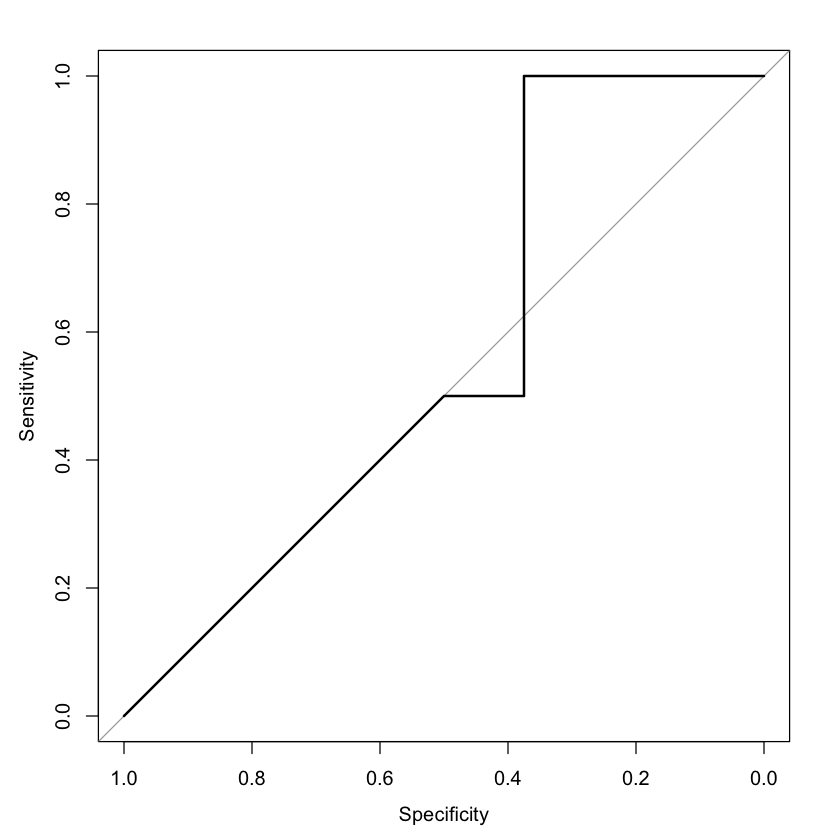

In [21]:
#----------------------------------------------------
# Check the feature importance

xgb.importance(bst, feature_names=features)

#=====================================================
# Make some predictions on the test set & evaluage the results

# Make Predictions
test[, ProbSale := predict(bst, newdata=testM)]

#-----------------------------------------------------
# Rank the predictions from most likely to least likely

setorder(test, -ProbSale)
test[, ProbSaleRk := .I]

#-----------------------------------------------------
# Take a look

test[, list(ProbSaleRk, CompanyName, ProbSale, Sale)]


#------------------------------------------------------
# Let's evaluage the results using area under the ROC curve using the pROC package

rocCurve <- roc(response=test$Sale, predictor = test$ProbSale, direction = "<")
rocCurve$auc
plot(rocCurve)
